🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔹 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5        

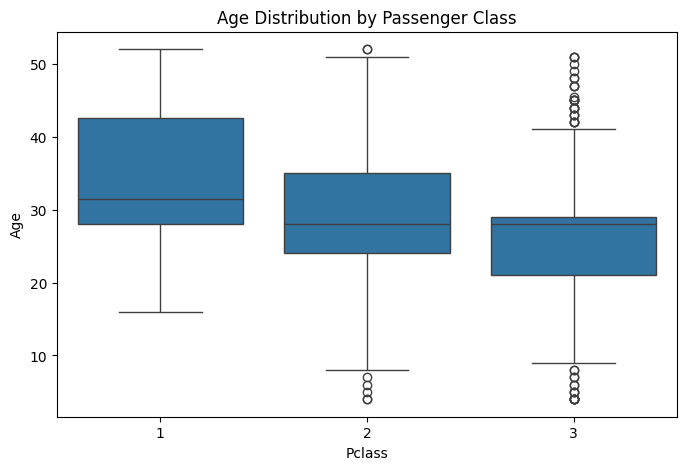

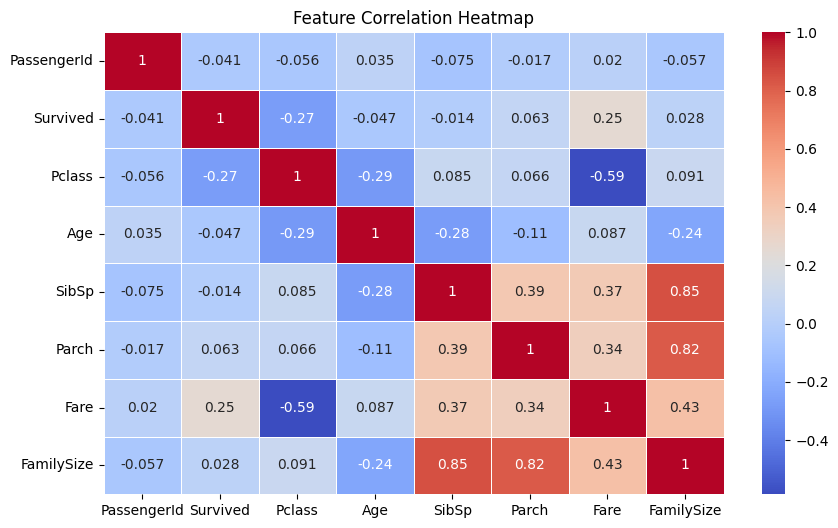

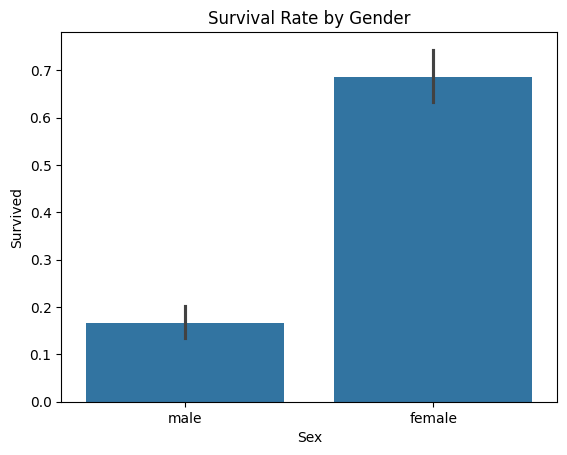

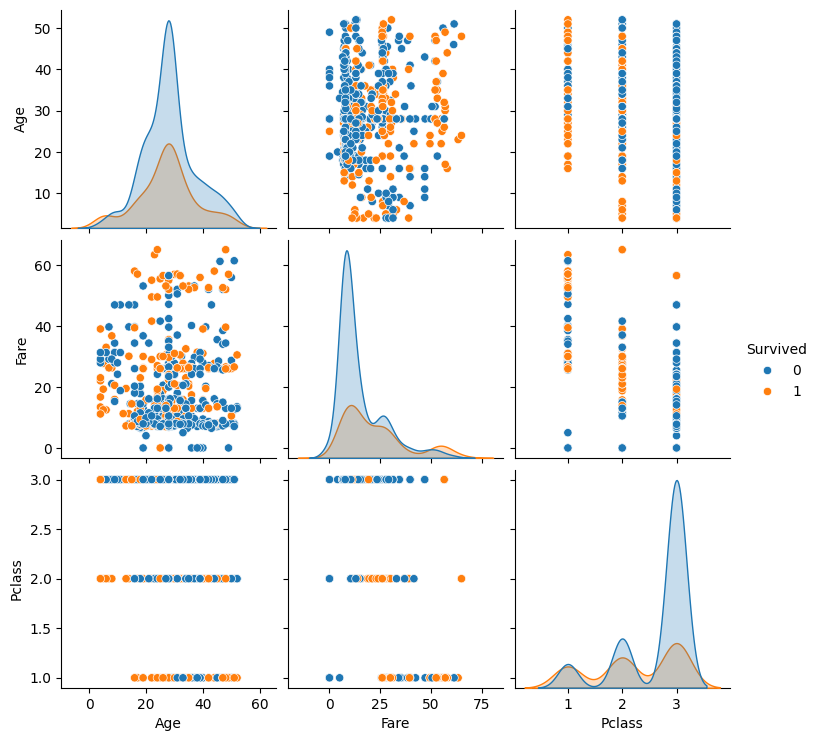


✅ Data Visualization Completed!

🔹 Feature Correlations with Survival:
Survived       1.000000
Fare           0.253976
Parch          0.062613
FamilySize     0.027501
SibSp         -0.014041
PassengerId   -0.040845
Age           -0.047293
Pclass        -0.272344
Name: Survived, dtype: float64

✅ EDA Completed!


In [3]:
# Assignment 1: EDA on Titanic Dataset
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
file_path = "train.csv"  # Ensure this file is in your Jupyter directory
df = pd.read_csv(file_path)

# ---------- STEP 1: Display Dataset Overview ----------
print("🔹 Dataset Overview:")
print(df.info())  # Show data types and non-null counts
print("\n🔹 First 5 Rows:")
print(df.head())

# ---------- STEP 2: Handle Missing Values ----------
print("\n🔹 Checking Missing Values:")
print(df.isnull().sum())

# Fill missing 'Age' with median, 'Embarked' with mode, and drop 'Cabin' (too many missing)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])  # Drop 'Cabin' due to excessive missing values

print("\n✅ Missing Values Handled!")

# ---------- STEP 3: Detect & Remove Outliers using IQR ----------
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Removing outliers for 'Fare' and 'Age' if they exist in the dataset
if 'Fare' in df.columns:
    df = remove_outliers_iqr(df, 'Fare')
if 'Age' in df.columns:
    df = remove_outliers_iqr(df, 'Age')

print("\n✅ Outliers Removed!")

# ---------- STEP 4: Feature Engineering ----------
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Create Family Size feature
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

print("\n🔹 New Features Added:")
print(df[['FamilySize', 'AgeGroup']].head())

# ---------- STEP 5: Data Visualization ----------
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

print("\n✅ Data Visualization Completed!")

# ---------- STEP 6: Correlation Analysis ----------
print("\n🔹 Feature Correlations with Survival:")
print(numeric_df.corr()['Survived'].sort_values(ascending=False))

print("\n✅ EDA Completed!")

In [5]:
#Assignment-2
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ---------- STEP 1: Load the Dataset ----------
file_path = "train.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Display dataset overview
print("\n🔹 Dataset Overview:")
print(df.info())  # Show data types and non-null counts
print("\n🔹 First 5 Rows:")
print(df.head())

# ---------- STEP 2: Check for Missing Values ----------
print("\n🔹 Checking Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

# ---------- STEP 3: Handle Missing Numerical Values ----------
# Selecting numerical columns and excluding 'Id'
numerical_cols = df.select_dtypes(include=['number']).columns.drop('Id', errors='ignore')

# Filling numerical missing values with median
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

print("\n✅ Missing Numerical Values Filled!")

# ---------- STEP 4: Handle Missing Categorical Values ----------
# Selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Filling categorical missing values with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with most frequent value

print("\n✅ Missing Categorical Values Filled!")

# ---------- STEP 5: Drop Irrelevant or Redundant Columns ----------
columns_to_drop = ['Id']  # Example: 'Id' column is usually irrelevant for ML models
df = df.drop(columns=columns_to_drop, errors='ignore')
print("\n✅ Irrelevant Columns Dropped!")

# ---------- STEP 6: Normalize Numerical Columns ----------
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\n✅ Numerical Columns Normalized!")

# ---------- STEP 7: Save Cleaned Dataset ----------
output_file = "cleaned_housing_prices.csv"
df.to_csv(output_file, index=False)
print(f"\n✅ Cleaned Dataset Saved as '{output_file}'")


🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔹 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5       

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from scipy.stats import skew

# ---------- STEP 1: Load Dataset ----------
file_path = "employee_attrition.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Display dataset overview
print("🔹 Dataset Overview:")
print(df.info())  # Check data types and missing values
print("\n🔹 First 5 Rows:")
print(df.head())

# ---------- STEP 2: Identify Categorical & Numerical Features ----------
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

print("\n🔹 Categorical Columns:", list(categorical_cols))
print("\n🔹 Numerical Columns:", list(numerical_cols))

# ---------- STEP 3: Encode Categorical Features ----------
# Using Label Encoding for binary categorical features
label_enc = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:  # Binary categorical columns
        df[col] = label_enc.fit_transform(df[col])
    else:  # One-Hot Encoding for multi-category columns
        df = pd.get_dummies(df, columns=[col], drop_first=True)

print("\n✅ Categorical Features Encoded!")

# ---------- STEP 4: Scale Numerical Features ----------
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\n✅ Numerical Features Scaled!")

# ---------- STEP 5: Create New Features ----------
df["TotalWorkingYears"] = df["Age"] - df["Education"]

print("\n✅ New Feature Created: 'TotalWorkingYears'")

# ---------- STEP 6: Check Skewness & Apply Log Transformation ----------
log_transform_columns = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in log_transform_columns:
    df[col] = np.log1p(df[col].clip(lower=1e-5))  # Ensures no zero/negative values

print("\n✅ Log Transformation Applied to Highly Skewed Features!")

# ---------- STEP 7: Save Transformed Dataset ----------
output_file = "transformed_employee_attrition.csv"
df.to_csv(output_file, index=False)

print(f"\n✅ Transformed Dataset Saved as '{output_file}'")

🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobL